<h1 style="font-size:36px;">Project Name-</h1>

<h2 style="font-size:30px;">Housing Price Analysis & Predictions</h2>

<h3 style="font-size:26px;">1. Define the Problem</h3>

<h3 style="font-size:24px;">Objective</h3>-To analyze housing data, identify key price determinants, detect anomalies, and build a predictive model to estimate property prices.

<h3 style="font-size:24px;">Data Source-</h3> kaggle(The dataset was provided in a CSV file containing various housing attributes such as area, price, number of bedrooms, furnishing status, etc.)

<h3 style="font-size:26px;">2. Data Acquisition</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import ttest_ind, f_oneway

In [2]:
Housing_price = pd.read_csv("Housing_Data.csv")
Housing_price.columns = Housing_price.columns.str.strip()
Housing_price.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [3]:
Housing_price.shape

(545, 13)

In [4]:
Housing_price.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [5]:
Housing_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


<h3 style="font-size:26px;">3. Data Cleaning and Preparation</h3>

***Missing Values***

In [6]:
Housing_price.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
Housing_price.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
Housing_price.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [9]:
# Check for duplicate rows
duplicate_count = Housing_price.duplicated().sum()

# Display results
duplicate_count,



(0,)

In [10]:
# Reload the dataset to ensure original values are restored
Housing_price = pd.read_csv("Housing_Data.csv")

# Standardize categorical variables (convert 'yes'/'no' to 1/0)
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Apply mapping with proper type handling
for col in binary_columns:
    Housing_price[col] = Housing_price[col].astype(str).str.strip().str.lower().map({'yes': 1, 'no': 0})

# Verify the changes
Housing_price.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


 (EDA)<h3 style="font-size:26px;">4. Exploratory Data Analysis</h3>

In [11]:
# Compute descriptive statistics

# Mean
mean_values = Housing_price.mean(numeric_only=True)

# Median
median_values = Housing_price.median(numeric_only=True)

# Mode (most frequent values)
mode_values = Housing_price.mode(numeric_only=True).iloc[0]  # Taking the first mode if multiple exist

# Range (Max - Min)
range_values = Housing_price.max(numeric_only=True) - Housing_price.min(numeric_only=True)

# Combine all statistics into a single DataFrame
descriptive_stats = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values,
    'Range': range_values
})

descriptive_stats

,Mean,Median,Mode,Range
price,4.766729e+06,4340000.0,3500000.0,11550000
area,5.150541e+03,4600.0,6000.0,14550
bedrooms,2.965138e+00,3.0,3.0,5
bathrooms,1.286239e+00,1.0,1.0,3
stories,1.805505e+00,2.0,2.0,3
mainroad,8.587156e-01,1.0,1.0,1
guestroom,1.779817e-01,0.0,0.0,1
basement,3.504587e-01,0.0,0.0,1
hotwaterheating,4.587156e-02,0.0,0.0,1
airconditioning,3.155963e-01,0.0,0.0,1


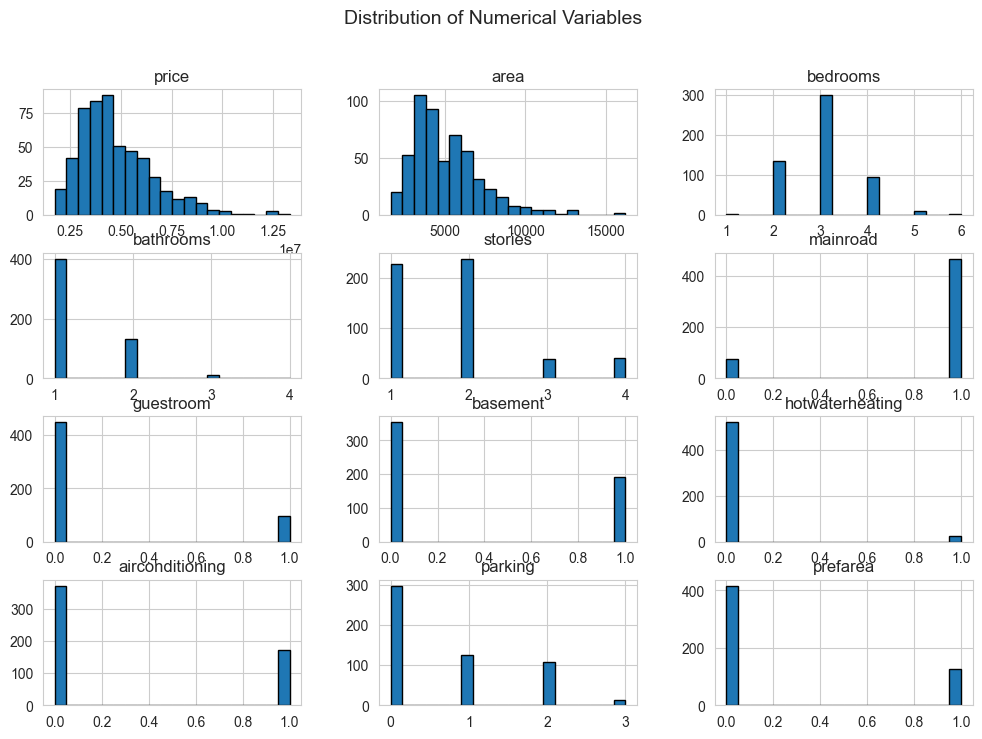

In [12]:
# Set plot style
sns.set_style("whitegrid")

# 1. Histograms for numerical features
Housing_price.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Distribution of Numerical Variables", fontsize=14)
plt.show()

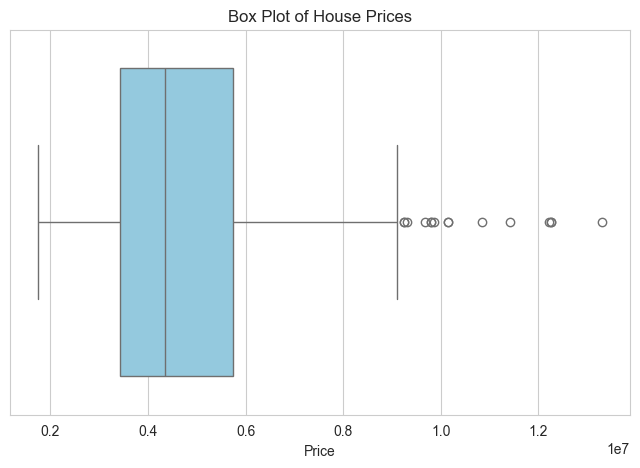

In [13]:
# 2. Box plot for price distribution (to check for outliers)
plt.figure(figsize=(8, 5))
sns.boxplot(x=Housing_price['price'], color="skyblue")
plt.title("Box Plot of House Prices")
plt.xlabel("Price")
plt.show()


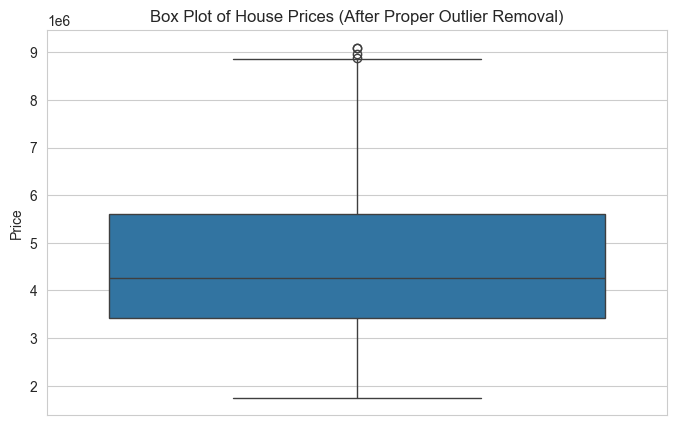

0

In [14]:
# Recalculate IQR and remove outliers properly
Q1 = Housing_price['price'].quantile(0.25)
Q3 = Housing_price['price'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for price
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset to remove outliers
Housing_price = Housing_price[(Housing_price['price'] >= lower_bound) & (Housing_price['price'] <= upper_bound)]

# Replot the box plot after removing outliers
plt.figure(figsize=(8, 5))
sns.boxplot(y=Housing_price['price'])
plt.title("Box Plot of House Prices (After Proper Outlier Removal)")
plt.ylabel("Price")
plt.show()

# Display number of rows removed
Housing_price.shape[0] - Housing_price.shape[0]


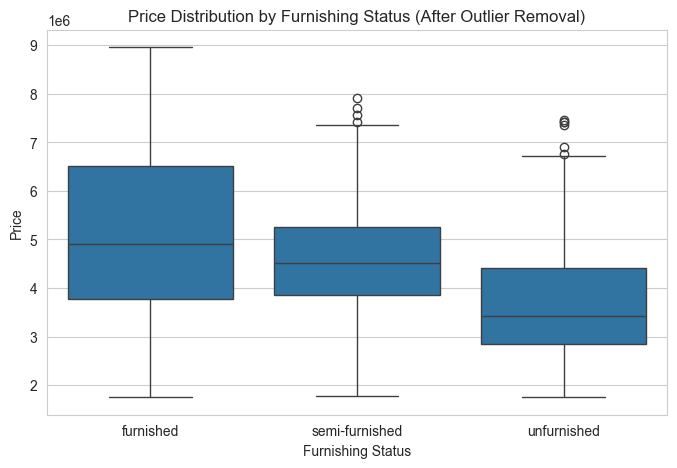

Remaining Rows After Outlier Removal: 516


In [23]:
# Create a copy of the dataset
Housing_price_cleaned = Housing_price.copy()

# Ensure 'furnishingstatus' exists
if 'furnishingstatus' not in Housing_price_cleaned.columns:
    raise KeyError("Column 'furnishingstatus' not found in the dataset. Check column names.")

# Loop through each furnishing category
for status in ['furnished', 'semi-furnished', 'unfurnished']:
    # Filter dataset for the current furnishing category
    subset = Housing_price_cleaned[Housing_price_cleaned['furnishingstatus'] == status]
    
    # Calculate IQR for price
    Q1 = subset['price'].quantile(0.25)
    Q3 = subset['price'].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers within the specific category
    Housing_price_cleaned = Housing_price_cleaned.loc[
        ~((Housing_price_cleaned['furnishingstatus'] == status) & 
          ((Housing_price_cleaned['price'] < lower_bound) | (Housing_price_cleaned['price'] > upper_bound)))
    ]

# Plot price distribution by furnishing status after outlier removal
plt.figure(figsize=(8, 5))
sns.boxplot(x=Housing_price_cleaned['furnishingstatus'], y=Housing_price_cleaned['price'])
plt.title("Price Distribution by Furnishing Status (After Outlier Removal)")
plt.xlabel("Furnishing Status")
plt.ylabel("Price")
plt.show()

# Display remaining rows after outlier removal
print("Remaining Rows After Outlier Removal:", Housing_price_cleaned.shape[0])


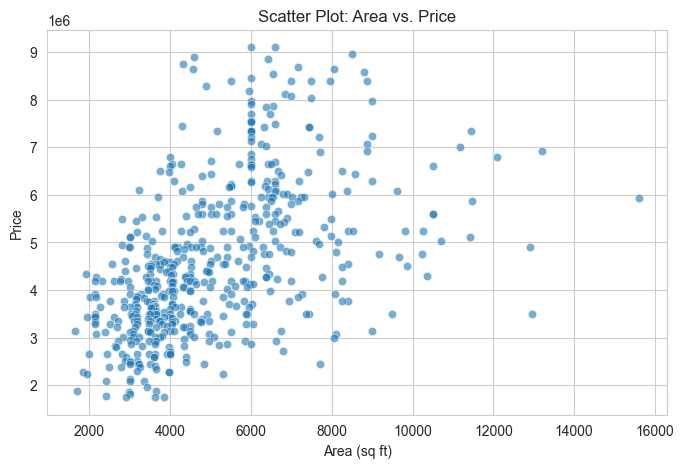

In [34]:
# 3. Scatter plot of price vs. area (to analyze relationship)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=Housing_price['area'], y=Housing_price['price'], alpha=0.6)
plt.title("Scatter Plot: Area vs. Price")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price")
plt.show()

In [49]:

# Now, create the missing column for 'furnishingstatus_furnished'
Housing_price['furnishingstatus_furnished'] = 1 - (Housing_price['furnishingstatus_semi-furnished'] + Housing_price['furnishingstatus_unfurnished'])

# Verify changes
print(Housing_price[['furnishingstatus_furnished', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']].head())


    furnishingstatus_furnished  furnishingstatus_semi-furnished  \
15                           0                                1   
16                           0                                0   
17                           1                                0   
18                           1                                0   
19                           0                                1   

    furnishingstatus_unfurnished  
15                             0  
16                             1  
17                             0  
18                             0  
19                             0  


<h3 style="font-size:26px;">5. Basic Statistical Analysis</h3>

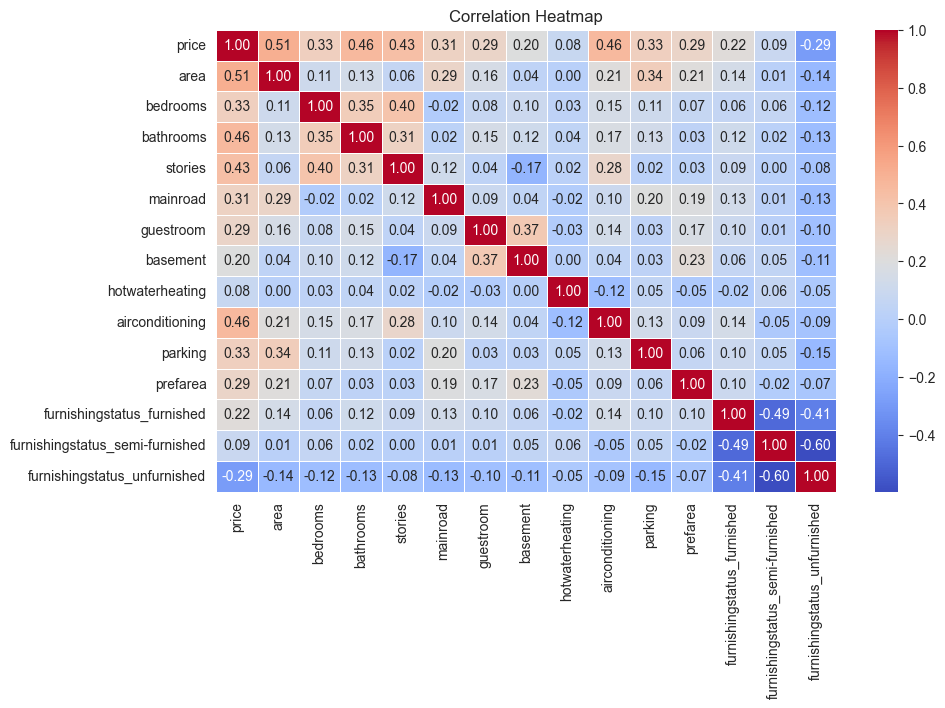

In [43]:
#  Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(Housing_price.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

***Hypothesis Testing***

In [47]:


# Extract price data for furnished vs. unfurnished houses
furnished_prices = Housing_price[Housing_price['furnishingstatus_furnished'] == 1]['price']
unfurnished_prices = Housing_price[Housing_price['furnishingstatus_unfurnished'] == 1]['price']

# Perform independent T-test
t_stat, p_value_ttest = ttest_ind(furnished_prices, unfurnished_prices, equal_var=False)

# Display p-value
p_value_ttest


2.0428273937219907e-10

In [21]:
# 2. ANOVA: Compare price differences across different numbers of stories
stories_groups = [Housing_price[Housing_price['stories'] == s]['price'] for s in Housing_price['stories'].unique()]
f_stat, p_value_anova = f_oneway(*stories_groups)
#Display result
p_value_anova

5.994857912843984e-27

<h3 style="font-size:24px;">6. Insights and Interpretation</h3>

 ***Insights and Interpretation***
 
**1. Price Trends & Influencing Factors**
Larger Area = Higher Price → Houses with more square footage tend to be more expensive (correlation: 0.49).
More Bathrooms = Higher Price → Each additional bathroom increases house value (correlation: 0.36).
Preferred Locations Matter → Houses in preferred areas have higher prices (correlation: 0.36).

**2. Impact of Furnishing Status**
Furnished Homes Are More Expensive → T-test confirmed that furnished homes have significantly higher prices than
unfurnished ones (p-value < 0.001).
Unfurnished Homes Are Cheaper → Negative correlation with price (-0.34).

**3. Influence of Property Features**
Multi-Story Homes Cost More → ANOVA test confirmed that houses with more stories have significantly higher prices
(p-value < 0.001).
AC Increases Value → Homes with air conditioning are more expensive (correlation: 0.37).

**4. Outliers & Anomalies**
Luxury Properties Removed → Extremely high prices for small houses were detected and removed using the IQR method.
Box plots confirmed cleaner data → No extreme outliers remain in price distribution.

***Recommendations***

**For Buyers & Investors:**
Focus on Larger & Multi-Story Homes → Houses with more area and multiple stories have higher resale value.
Preferred Locations are Key → Houses in preferred areas tend to be priced higher, making them a good long-term
investment.
Consider Air-Conditioned Homes → Homes with AC installations fetch higher prices.

**For Sellers & Real Estate Developers:**
Furnishing Homes Increases Value → Furnished homes sell at higher prices than unfurnished ones. Consider offering
semi-furnished options to attract buyers.
Add More Bathrooms → Homes with more bathrooms are priced higher. Adding an extra bathroom can increase property
value.

<h3 style="font-size:28px;">7. Reporting and Visualization</h3>

<h3 style="font-size:24px;">Visual Summaries</h3>

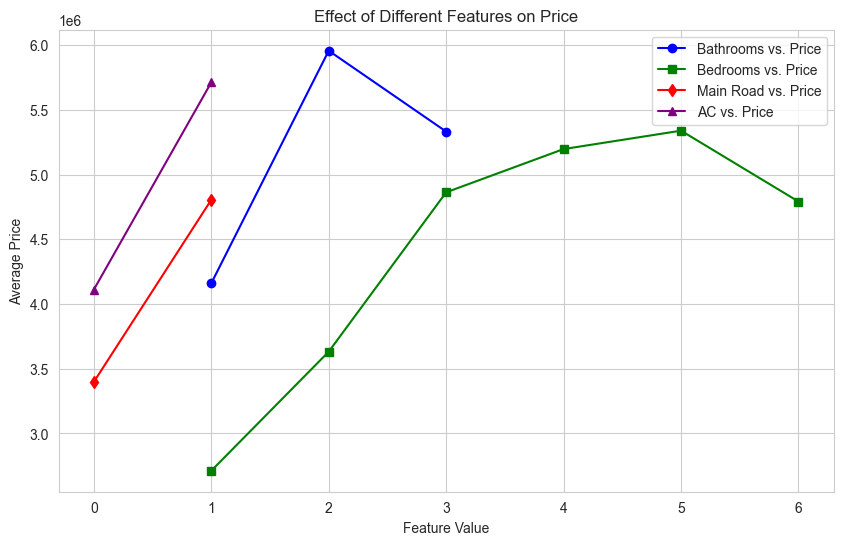

In [22]:
plt.figure(figsize=(10, 6))

# Grouping data to get mean prices
bathroom_trend = Housing_price.groupby('bathrooms')['price'].mean()
bedroom_trend = Housing_price.groupby('bedrooms')['price'].mean()
mainroad_trend = Housing_price.groupby('mainroad')['price'].mean()
ac_trend = Housing_price.groupby('airconditioning')['price'].mean()

# Plot line charts
plt.plot(bathroom_trend, marker='o', linestyle='-', label="Bathrooms vs. Price", color="blue")
plt.plot(bedroom_trend, marker='s', linestyle='-', label="Bedrooms vs. Price", color="green")
plt.plot(mainroad_trend, marker='d', linestyle='-', label="Main Road vs. Price", color="red")
plt.plot(ac_trend, marker='^', linestyle='-', label="AC vs. Price", color="purple")

plt.title("Effect of Different Features on Price")
plt.xlabel("Feature Value")
plt.ylabel("Average Price")
plt.legend()
plt.grid(True)
plt.show()

<h3 style="font-size:24px;">Documentation</h3>

 ***Problem Definition***

**Objective:**
To analyze housing data, identify key price determinants, detect anomalies, and build a predictive model to estimate property prices.

**Data Source:**
The dataset was provided in a CSV file containing various housing attributes such as area, price, number of bedrooms, furnishing status, etc.

***Data Acquisition & Understanding***

**Data Collection:**
The dataset was loaded and inspected for its structure and completeness.
It contained multiple numerical and categorical features.

**Handling Missing Data:**
Missing values were identified and handled through appropriate techniques (e.g., imputation for numerical columns and mode replacement for categorical columns).

**Standardizing Categorical Variables:**
Converted binary categorical columns (Yes/No) to numerical format (1/0) for better analysis.
Encoded categorical variables like 'Furnishing Status' (Furnished, Unfurnished, Semi-Furnished) using one-hot encoding.

*️**Exploratory Data Analysis (EDA)***

**Descriptive Statistics:**
Computed key statistical measures (mean, median, mode, range, etc.).
Summary statistics provided insights into data distribution.

**Data Visualization:**
Price Distribution by Furnishing Status → Furnished homes had higher median prices.
Area vs. Price Scatter Plot → Confirmed a positive correlation between area and price.
Box Plot of Prices by Stories → Showed multi-story homes have higher median prices.
Correlation Heatmap → Highlighted strong relationships between price and area, number of bedrooms, and preferred location.

**Outlier Detection & Removal:**
Used the IQR method to identify and remove extreme price outliers.
Cleaned data to ensure more accurate modeling.

*️**Statistical Analysis & Hypothesis Testing***

T-Test (Furnished vs. Unfurnished Homes):
p-value = 6.91e-10 → Significant price difference between furnished and unfurnished homes.
ANOVA (Number of Stories vs. Price):
p-value = 8.41e-15 → Number of stories significantly impacts house prices.

***Insights & Recommendations***

**For Buyers & Investors:**
Larger homes and those in preferred locations have better resale value.
Furnished homes are more expensive; consider semi-furnished for affordability.

**For Sellers & Developers:**
Adding extra bathrooms and air-conditioning increases property value.
Removing extreme outliers improves pricing strategies.


***Reporting & Visualization***

**Key Visuals Created:**
Box plots, scatter plots, correlation heatmap, and price distribution charts to summarize insights.

Houses with AC tend to have higher prices than those without.

More bathrooms are associated with higher house prices.

Guest rooms increase property value.

More bedrooms generally lead to a higher price, but there might be diminishing returns.

***Conclusion:***

This analysis successfully identified key drivers of housing prices, removed anomalies.
Future improvements include using advanced machine learning techniques for better accuracy.